In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif 
from matplotlib import pyplot as plt

%matplotlib inline

In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/vsydorskyi/anaconda3/envs/venv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

## Prepare data

In [2]:
X, y = make_classification(
    n_samples=2_000,
    n_features=23,
    n_informative=10,
    n_redundant=8,
    n_repeated=5,
    n_clusters_per_class=1,
    n_classes=4,
    random_state=4
)

In [3]:
df = pd.DataFrame(
    data=X
)
df['target'] = y

df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,target
0,-1.118634,2.758333,5.849194,1.677213,2.758333,-0.186838,-2.206054,-0.065494,-0.936906,-0.002525,...,-0.936906,-1.283749,7.428301,4.813134,2.120303,-4.798933,4.215357,-1.283749,4.813134,0
1,9.666367,-3.313684,-1.964781,-0.192451,-3.313684,-0.411854,-1.381605,-2.986486,2.101480,2.528258,...,2.101480,-3.979637,-1.426785,2.461842,0.477017,0.273063,-0.694153,-3.979637,2.461842,1
2,5.175554,-2.300813,0.502978,0.445304,-2.300813,0.381461,-2.087927,1.179589,-0.852026,3.431892,...,-0.852026,-2.258758,4.742661,0.500419,-0.063522,-2.027888,4.799441,-2.258758,0.500419,0
3,1.644367,1.376074,-1.083476,0.471245,1.376074,-3.011079,0.670389,-2.391883,1.351728,3.440723,...,1.351728,-3.810244,1.131913,4.960333,3.090695,-0.786673,7.268418,-3.810244,4.960333,0
4,3.084004,-0.737804,2.573643,0.010980,-0.737804,0.374784,1.413446,1.205317,-1.997323,-0.027038,...,-1.997323,-0.160965,1.966570,4.775234,0.173981,-1.320997,-0.472341,-0.160965,4.775234,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-3.431381,3.688318,1.411929,3.096248,3.688318,0.910217,3.804817,0.597002,-3.486179,-1.929971,...,-3.486179,2.267291,0.888435,3.502578,2.403265,-0.594005,-2.844771,2.267291,3.502578,1
1996,6.160944,-3.525180,4.912027,-0.473496,-3.525180,3.210106,4.446166,6.201211,-3.921369,3.116167,...,-3.921369,1.365059,4.478447,4.485842,0.247725,-1.994488,-0.461869,1.365059,4.485842,3
1997,1.253849,5.098850,-4.530375,3.605874,5.098850,-3.372348,3.073139,-1.655989,3.148633,4.804913,...,3.148633,-2.500980,-9.962969,-3.562287,0.243930,5.431404,-3.002489,-2.500980,-3.562287,3
1998,5.729280,-4.707561,-3.065752,-1.299026,-4.707561,-0.180035,2.804020,1.973282,-2.426462,3.960313,...,-2.426462,-1.251736,2.099108,2.756653,0.109182,-0.216554,6.715202,-1.251736,2.756653,1


## SeleckKBest (f_classif)

In [4]:
k_best = SelectKBest(f_classif, k=12).fit(df.drop(columns='target'), df['target'])
f_classif_scores = k_best.scores_

## SeleckKBest (mutual_info_classif)

In [5]:
k_best = SelectKBest(mutual_info_classif, k=12).fit(df.drop(columns='target'), df['target'])
mutual_info_classif_scores = k_best.scores_

## Results

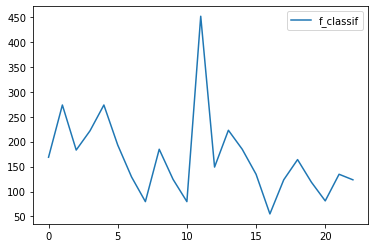

In [9]:
plt.plot(f_classif_scores, label='f_classif')
plt.legend()
plt.show()

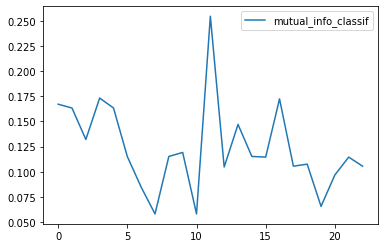

In [10]:
plt.plot(mutual_info_classif_scores, label='mutual_info_classif')
plt.legend()
plt.show()